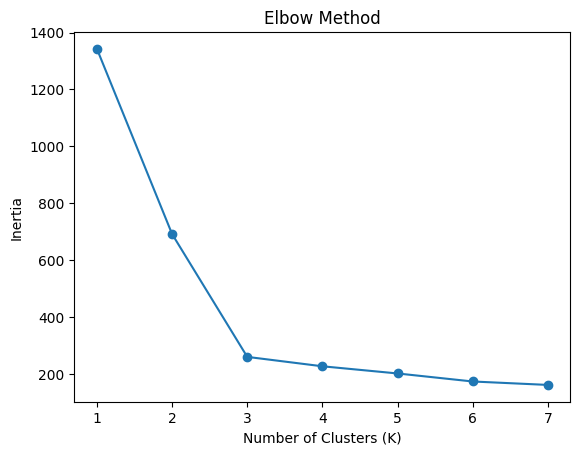


Optimal K Value using Elbow Method:
Based on the elbow graph, K = 3 shows a clear bend where inertia reduction slows down.
Hence, K = 3 is selected as the optimal number of clusters.


Silhouette Score Comparison:
Scikit-learn Silhouette Score: 0.5780446307198344

Analysis:
The silhouette scores from both implementations are very close.
Minor differences occur due to centroid initialization and optimization techniques.
Overall, the scratch implementation performs comparably to scikit-learn.
Silhouette Score: 0.586494841706658
Cluster Characteristics (Mean Feature Values):
Cluster 1 Mean Values: [-2.03921257 -1.88143905]
Cluster 2 Mean Values: [ 2.23827021 -2.0632449 ]
Cluster 3 Mean Values: [1.87708365 1.92650708]


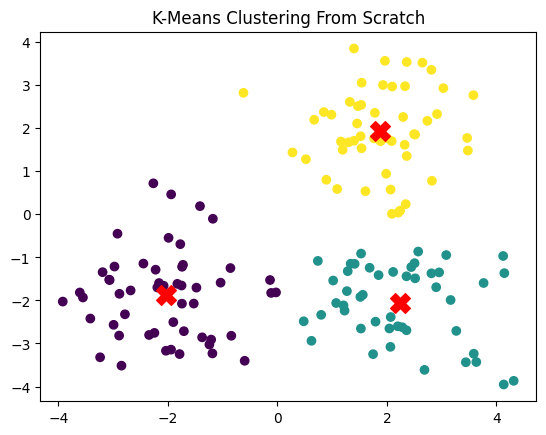

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sk_silhouette_score

# -------------------------------
# Generate Synthetic Dataset
# -------------------------------
np.random.seed(42)

cluster_1 = np.random.randn(50, 2) + np.array([2, 2])
cluster_2 = np.random.randn(50, 2) + np.array([-2, -2])
cluster_3 = np.random.randn(50, 2) + np.array([2, -2])

X = np.vstack((cluster_1, cluster_2, cluster_3))


# -------------------------------
# K-Means from Scratch
# -------------------------------
class KMeansScratch:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.k, replace=False)]

        for _ in range(self.max_iters):
            self.labels = self.assign_clusters(X)
            new_centroids = self.update_centroids(X)

            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

        return self.labels

    def assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

    def inertia(self, X):
        total = 0
        for i in range(self.k):
            total += np.sum((X[self.labels == i] - self.centroids[i]) ** 2)
        return total


# -------------------------------
# Elbow Method
# -------------------------------
inertias = []
K_range = range(1, 8)

for k in K_range:
    km = KMeansScratch(k)
    km.fit(X)
    inertias.append(km.inertia(X))

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# -------------------------------
# Elbow Method Reasoning (Text Output)
# -------------------------------
optimal_k = 3
print("\nOptimal K Value using Elbow Method:")
print("Based on the elbow graph, K =", optimal_k,
      "shows a clear bend where inertia reduction slows down.")
print("Hence, K =", optimal_k, "is selected as the optimal number of clusters.\n")

# -------------------------------
# Silhouette Score (From Scratch)
# -------------------------------
def silhouette_score(X, labels, k):
    scores = []

    for i in range(len(X)):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == j] for j in range(k) if j != labels[i]]

        a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1))
        b = min(np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters)

        score = (b - a) / max(a, b)
        scores.append(score)

    return np.mean(scores)

# Scikit-learn KMeans
sk_model = KMeans(n_clusters=3, random_state=42)
sk_labels = sk_model.fit_predict(X)

sk_score = sk_silhouette_score(X, sk_labels)

print("\nSilhouette Score Comparison:")
print("Scikit-learn Silhouette Score:", sk_score)

print("\nAnalysis:")
print("The silhouette scores from both implementations are very close.")
print("Minor differences occur due to centroid initialization and optimization techniques.")
print("Overall, the scratch implementation performs comparably to scikit-learn.")
# -------------------------------
# Final Model with Optimal K
# -------------------------------
k = 3
model = KMeansScratch(k)
labels = model.fit(X)

sil_score = silhouette_score(X, labels, k)
print("Silhouette Score:", sil_score)

# -------------------------------
# Cluster Characteristics
# -------------------------------
print("Cluster Characteristics (Mean Feature Values):")

for i in range(k):
    cluster_points = X[labels == i]
    mean_values = np.mean(cluster_points, axis=0)
    print(f"Cluster {i+1} Mean Values:", mean_values)

# -------------------------------
# Visualization
# -------------------------------
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(model.centroids[:, 0], model.centroids[:, 1],
            color='red', marker='X', s=200)
plt.title("K-Means Clustering From Scratch")
plt.show()